## Анализ и прогнозирование временных рядов методами искусственного интеллекта

### **Практическая работа 3. Поиск аномалий во временных рядах.**


#### **3.1 Поиск диссонансов с помощью алгоритма HotSAX**

##### 3.1.1 Загрузка и подготовка данных

В данной будет использоваться временной ряд, состоящий из показаний акселерометра. 
Анализируемый временной ряд, описывает две активности человека - бег и шаг.


In [2]:
!pip install scipy
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [1]:

!pip install --upgrade matplotlib
!pip install --upgrade numpy


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/8b/ce/15b0bb2fb29b3d46211d8ca740b96b5232499fc49200b58b8d571292c9a6/matplotlib-3.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB 131.3 kB/s eta 0:01:00
   ---------------------------------------- 0.0/7.8 MB 163.8 kB/s eta 0:00:48
   ---------------------------------------- 0.0/7.8 MB 219.4 kB/s eta 0:00:36
   ---------------------------------------- 0.1/7.8 MB 281.8 kB/s eta 0:00:28
    --------------------------------------- 0.1/7.8 MB 502.3 kB/s eta 0:00:16
   - -------------------------------------- 0.3/7.8 MB 787.7 kB/s eta 0:00:10
   -- --------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 2.1.2 which is incompatible.
faster-whisper 1.0.1 requires tokenizers<0.16,>=0.13, but you have tokenizers 0.20.0 which is incompatible.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 2.1.2 which is incompatible.
pytorch-metric-learning 2.6.0 requires numpy<2.0, but you have numpy 2.1.2 which is incompatible.
sktime 0.32.4 requires numpy<2.1,>=1.21, but you have numpy 2.1.2 which is incompatible.
tensorflow-intel 2.16.1 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 2.1.2 which is incompatible.
tortoise-tt

In [2]:
!pip freeze


absl-py==2.1.0
accelerate==0.34.2
aext-assistant @ file:///C:/b/abs_7e0qjcige6/croot/aext-assistant_1717062202219/work
aext-assistant-server @ file:///C:/b/abs_261y2c9vsm/croot/aext-assistant-server_1717060019302/work
aext-core @ file:///C:/b/abs_1e882xlg8y/croot/aext-core_1717056431204/work
aext-core-server @ file:///C:/b/abs_24av6ljtvu/croot/aext-core-server_1717075079138/work
aext-panels @ file:///C:/b/abs_44bc4hv663/croot/aext-panels_1717062218055/work
aext-panels-server @ file:///C:/b/abs_7f9_48fhp3/croot/aext-panels-server_1717060738001/work
aext-share-notebook @ file:///C:/b/abs_4bhc14ko2x/croot/aext-share-notebook_1717059348177/work
aext-share-notebook-server @ file:///C:/b/abs_2b3c16a8t0/croot/aext-share-notebook-server_1717057990383/work
aext-shared @ file:///C:/b/abs_1ex0tj8g9m/croot/aext-shared_1716991146845/work
aiobotocore @ file:///C:/b/abs_1c1a_vjay2/croot/aiobotocore_1682537737724/work
aiofiles @ file:///C:/b/abs_9ex6mi6b56/croot/aiofiles_1683773603390/work
aiohttp @ f

In [4]:
!pip install --upgrade numpy pandas


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/d4/96/450054662295125af861d48d2c4bc081dadcf1974a879b2104613157aa62/numpy-2.1.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     -------------------------- ----------- 41.0/59.7 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 59.7/59.7 kB 798.4 kB/s eta 0:00:00
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/ed/8c/87ddf1fcb55d11f9f847e3c69bb1c6f8e46e2f40ab1a2d2abadb2401b007/pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/12.9 MB 5.1 MB/s eta 0:00:03
    --------------------------------------- 0.2/12.9 MB 2.9 MB/s eta 0:00:05
   - -------------------------------------- 0.4/12.9 MB 3.2 M

ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'C:\\Users\\seryk\\anaconda3\\Lib\\site-packages\\numpy\\_core\\_multiarray_umath.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [7]:
!pip install numpy==1.21 pandas==1.3.3


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/10.3 MB 93.9 kB/s eta 0:01:49
     --------------------------------------- 0.0/10.3 MB 109.5 kB/s eta 0:01:34
     --------------------------------------- 0.0/10.3 MB 131.3 kB/s eta 0:01:18
     --------------------------------------- 0.1/10.3 MB 145.8 kB/s eta 0:01:10
     --------------------------------------- 0.1/10.3 MB 172.4 kB/s eta 0:01:00
     --------------------------------------- 0.1/10.3 MB 300.4 kB/s eta 0:00:34
      -------------------------------------- 0.2/10.3 MB 509.6 kB/s eta 0:00:20
     - ------------------------------------- 0.4/10.3 MB 829.7 kB/s eta 0:00:12

  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [333 lines of output]
      Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com, https://pypi.ngc.nvidia.com
      Ignoring numpy: markers 'python_version == "3.7" and (platform_machine != "arm64" or platform_system != "Darwin") and platform_machine != "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8" and (platform_machine != "arm64" or platform_system != "Darwin") and platform_machine != "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_machine == "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8" and platform_machine == "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8" and platform_machine == "arm64" and platform_system == "Darwin"' don't

In [6]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from time import time
import pandas as pd

In [7]:

dataset_dir_path = Path('datasets')
data_path = dataset_dir_path/'walk_run.txt'
walk_run = np.loadtxt(data_path)[3000:4000]
data = walk_run
size_sub = 50

В середине временного ряда происходит смена активности (бег заменяет шаг). Нетипичным поведением, которое мы могли бы назвать диссонансами в данном ряде выступает небольшой участок между активностями, когда человек плавно увеличивает скорость шага до бега. В ходе данной работе наша задача выделить с помощью различных алгоритмов границы нашего диссонанса.

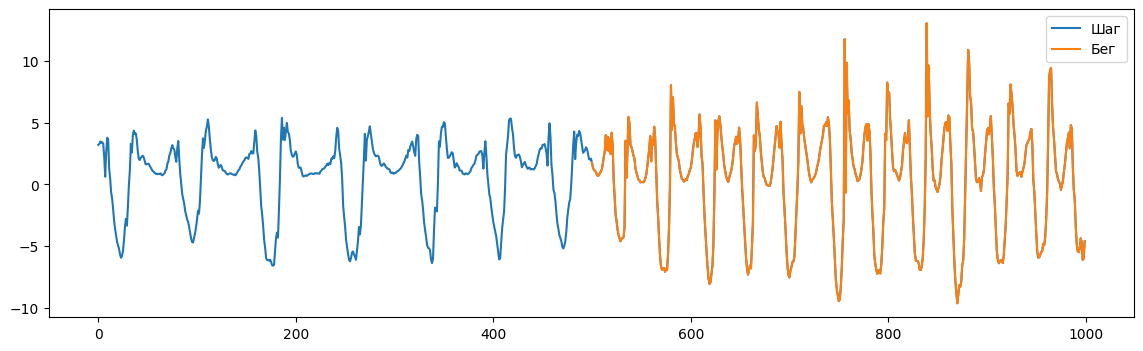

In [8]:
fig, ax =  plt.subplots(figsize=(14,4),ncols=1,nrows=1)
plt.plot(data[:],label='Шаг')
plt.plot(np.arange(data.shape[0]//2,data.shape[0]),data[data.shape[0]//2:],label='Бег')
plt.legend()

In [9]:
result={}
times={}

##### 3.1.2 Реализация полного перебора

Приводится пример кода для нахождения топ 5 диссонансов с помощью реализации полного беребора.
Вам необходимо добавить код для сбора времени обработки данных.

In [10]:
from modules.saxpy.discord import find_discords_brute_force
start = time()
discords_brute_force= np.stack(find_discords_brute_force(data[:], 50, 5))
end = time()

In [11]:
# Запись времени выполнения
times['brute_force'] = end - start

# Печать результата
print(f"Время выполнения полного перебора: {times['brute_force']} секунд")
print(f"Найденные диссонансы:\n{discords_brute_force}")

Время выполнения полного перебора: 152.541077375412 секунд
Найденные диссонансы:
[[477.           5.88100934]
 [412.           5.32704317]
 [195.           3.39426635]
 [577.           3.35554403]
 [278.           3.10959389]]


##### 3.1.3 HotSAX

Используя [реализацию](https://github.com/seninp/saxpy/blob/master/saxpy/hotsax.py) найдите топ 5 диссонансов ряда.
Произведите замер времени работы.

In [12]:
import numpy as np
from time import time
from modules.saxpy.hotsax import find_discords_hotsax
from modules.saxpy.discord import find_discords_brute_force

In [13]:
import numpy as np
from time import time
from modules.saxpy.hotsax import find_discords_hotsax
from modules.saxpy.discord import find_discords_brute_force

# Загрузка данных
dataset_dir_path = Path('E:/универ/Анализ и прогнозирование временных рядов методами искусственного интеллекта/1/2024-Gorbunov-TimeSeriesCourse/practice/03 Discords/datasets')
data_path = dataset_dir_path / 'walk_run.txt'
walk_run = np.loadtxt(data_path)[3000:4000]
data = walk_run
size_sub = 50

# Инициализация словарей для результатов и времени выполнения
result = {}  #
times = {}   
# Поиск диссонансов методом полного перебора
start_brute = time()  # Начало измерения времени
discords_brute_force = np.stack(find_discords_brute_force(data[:], size_sub, 5))
end_brute = time()  # Конец измерения времени

# Сохранение времени выполнения и результатов
times['brute_force'] = end_brute - start_brute
result['brute_force'] = discords_brute_force

# Поиск диссонансов методом HOT-SAX
start_hotsax = time()  # Начало измерения времени
discords_hotsax = find_discords_hotsax(data[:], win_size=50, num_discords=5)
end_hotsax = time()  # Конец измерения времени

# Сохранение времени выполнения и результатов
times['HOT-SAX'] = end_hotsax - start_hotsax
result['HOT-SAX'] = discords_hotsax

# Вывод результатов и времени выполнения
print("Результаты:", result)
print("Время выполнения:", times)


Результаты: {'brute_force': array([[477.        ,   5.88100934],
       [412.        ,   5.32704317],
       [195.        ,   3.39426635],
       [577.        ,   3.35554403],
       [278.        ,   3.10959389]]), 'HOT-SAX': [(477, 5.881009341683914), (412, 5.327043167878002), (195, 3.3942663473023327), (577, 3.3555440274836608), (278, 3.10959388763498)]}
Время выполнения: {'brute_force': 152.2297809123993, 'HOT-SAX': 3.7582101821899414}


##### 3.1.4 Визаулизация

Вам необходимо реализовать код позволяющий:
1. Вывести на одном графике ряд и его диссонансы
2. Столбчатую диаграмму времени работы обоих алгоритмов
   
Постройте графики для обоих алгоритмов и сравните полученные результаты.

Пример графика:

![first_graf](pics/fig_ex_1.png)

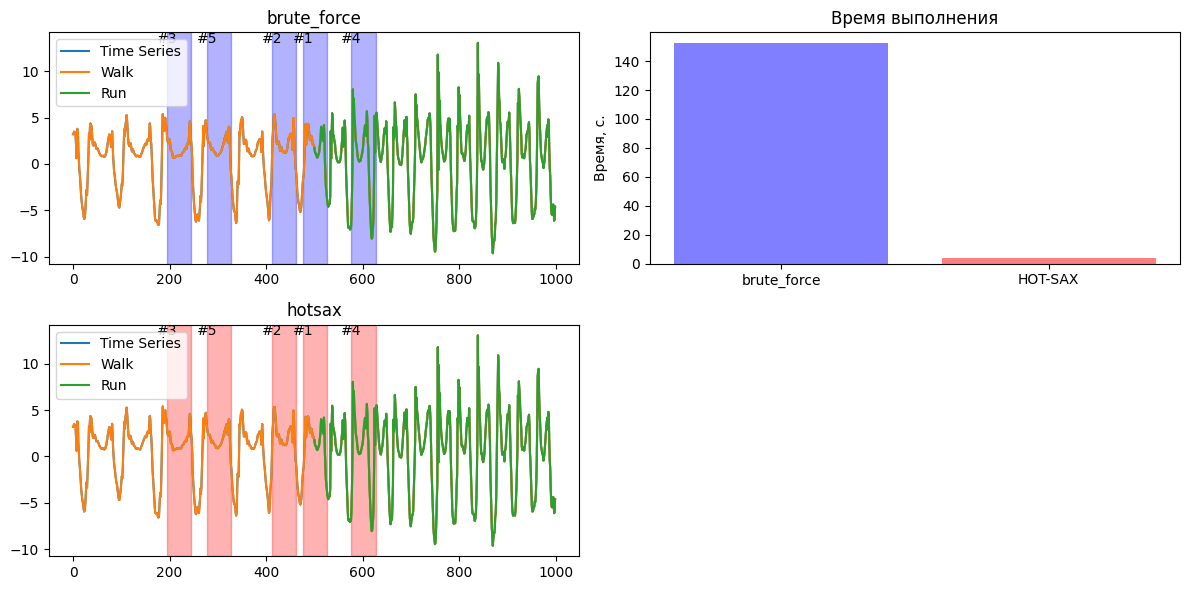

In [14]:
# Построение графиков
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

# Визуализация диссонансов методом полного перебора
axs[0, 0].plot(data, label='Time Series')
for idx, discord in enumerate(discords_brute_force):
    axs[0, 0].axvspan(discord[0], discord[0] + size_sub, color='blue', alpha=0.3)
    axs[0, 0].text(discord[0], max(data), f'#{idx+1}', fontsize=10, ha='center')
axs[0, 0].plot(data[:], label='Walk')
axs[0, 0].plot(np.arange(data.shape[0]//2, data.shape[0]), data[data.shape[0]//2:], label='Run')
axs[0, 0].set_title('brute_force')
axs[0, 0].legend()

# Визуализация диссонансов методом HOT-SAX
axs[1, 0].plot(data, label='Time Series')
for idx, discord in enumerate(discords_hotsax):
    axs[1, 0].axvspan(discord[0], discord[0] + size_sub, color='red', alpha=0.3)
    axs[1, 0].text(discord[0], max(data), f'#{idx+1}', fontsize=10, ha='center')
axs[1, 0].plot(data[:], label='Walk')
axs[1, 0].plot(np.arange(data.shape[0]//2, data.shape[0]), data[data.shape[0]//2:], label='Run')
axs[1, 0].set_title('brute_force')
axs[1, 0].set_title('hotsax')
axs[1, 0].legend()

# Столбчатая диаграмма времени выполнения
axs[0, 1].bar(times.keys(), times.values(), color=['blue', 'red'], alpha=0.5)
axs[0, 1].set_ylabel('Время, с.')
axs[0, 1].set_title('Время выполнения')

# Удаление пустого графика
fig.delaxes(axs[1, 1])

plt.tight_layout()
plt.show()


In [15]:
from matplotlib.patches import Rectangle

##### 3.1.5 Такси NY

Произведите поиск диссонансов с помощью обоих алгоритмов на наборе данных, содержащим информацию о среднем числе пассажиров в NY. Отобразите найденные диссонансы обоими алгоритмами. 

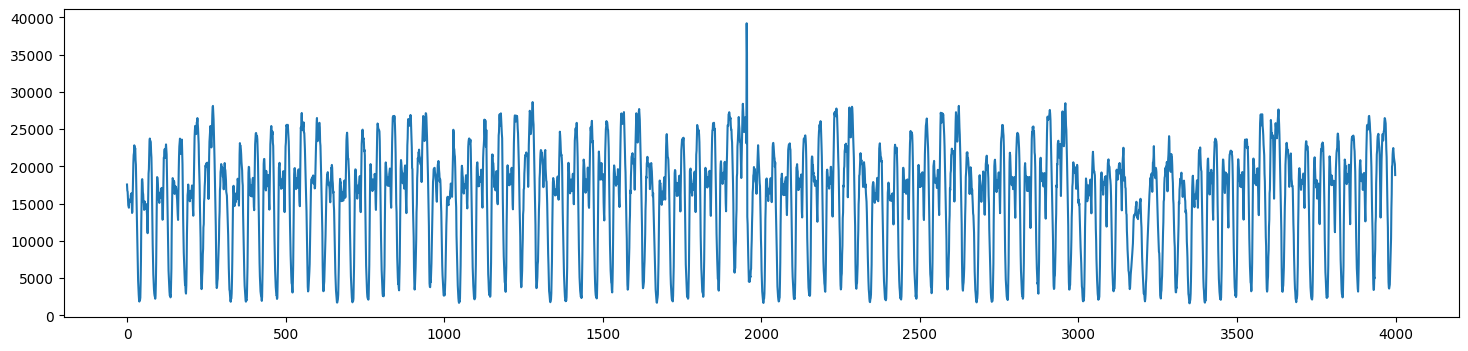

In [10]:
nyc_taxi = pd.read_csv(dataset_dir_path/'nyc_taxi.csv',index_col=0).values[4000:8000,0].astype(np.float64)
fig = plt.figure(figsize=(18, 4))
plt.plot(nyc_taxi)

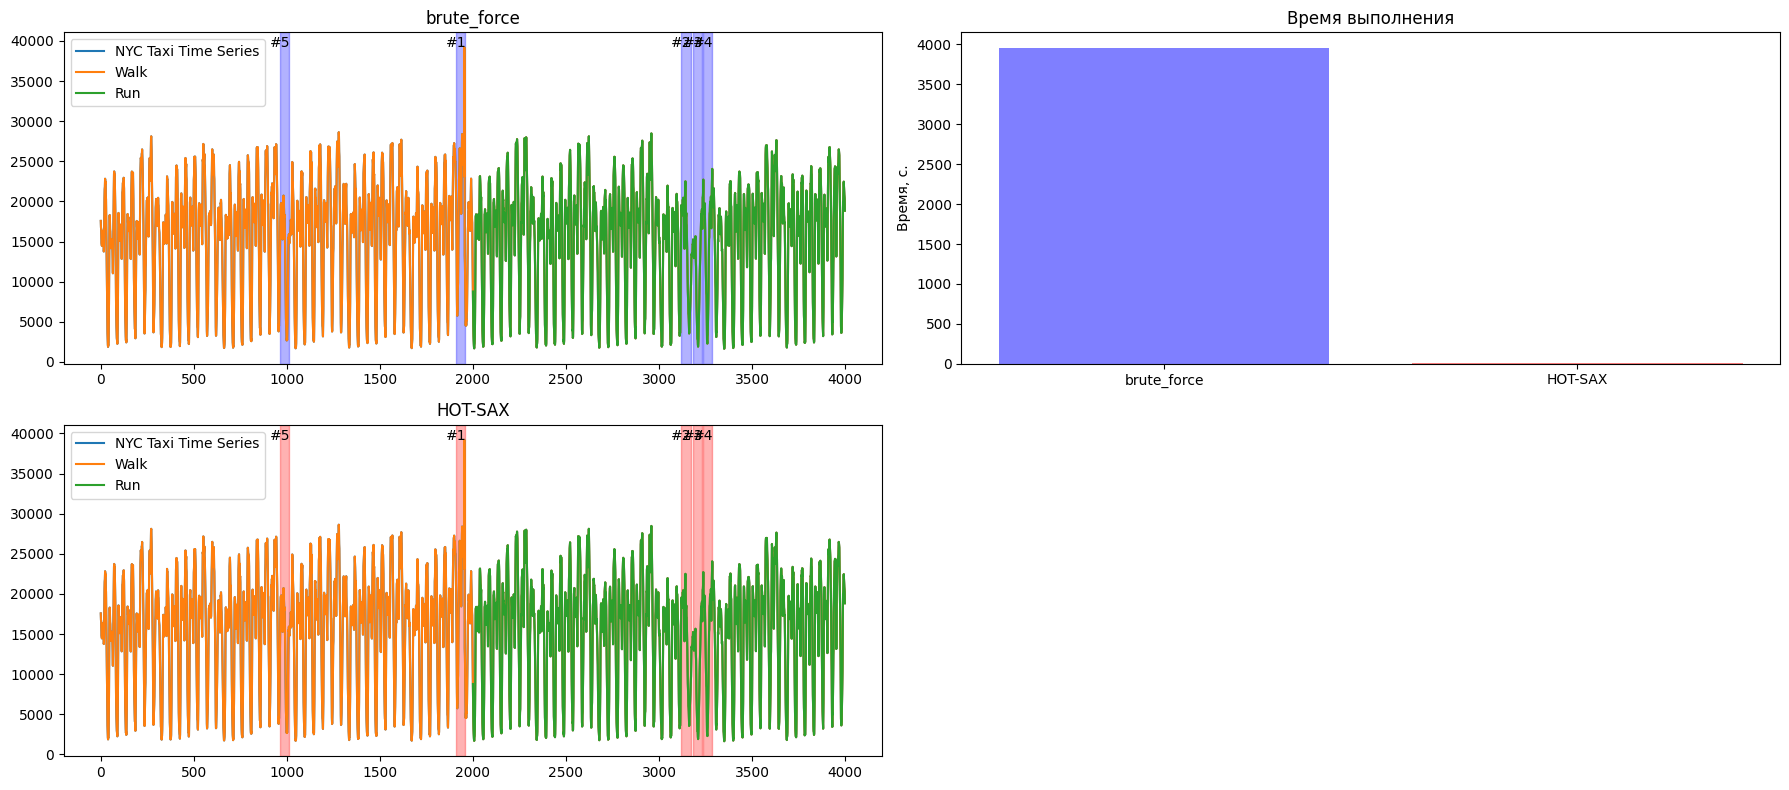

Время выполнения методов на данных NYC Taxi:
brute_force: 3954.211093187332 секунд
HOT-SAX: 14.896039009094238 секунд


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
from modules.saxpy.hotsax import find_discords_hotsax
from modules.saxpy.discord import find_discords_brute_force
from pathlib import Path

# Путь к папке с данными
dataset_dir_path = Path('datasets')

# Загрузка данных о такси в Нью-Йорке
nyc_taxi = pd.read_csv(dataset_dir_path / 'nyc_taxi.csv', index_col=0).values[4000:8000, 0].astype(np.float64)

# Размер окна для поиска диссонансов
win_size = 50

# Инициализация словарей для времени и результатов
result_taxi = {}
times_taxi = {}

# Поиск диссонансов методом полного перебора
start_brute = time()
discords_brute_force_taxi = np.stack(find_discords_brute_force(nyc_taxi, win_size, 5))
end_brute = time()

# Сохранение результатов и времени выполнения для метода полного перебора
times_taxi['brute_force'] = end_brute - start_brute
result_taxi['brute_force'] = discords_brute_force_taxi

# Поиск диссонансов методом HOT-SAX
start_hotsax = time()
discords_hotsax_taxi = find_discords_hotsax(nyc_taxi, win_size=win_size, num_discords=5)
end_hotsax = time()

# Сохранение результатов и времени выполнения для метода HOT-SAX
times_taxi['HOT-SAX'] = end_hotsax - start_hotsax
result_taxi['HOT-SAX'] = discords_hotsax_taxi

# Построение графиков
fig, axs = plt.subplots(2, 2, figsize=(18, 8))

# Визуализация диссонансов методом полного перебора
axs[0, 0].plot(nyc_taxi, label='NYC Taxi Time Series')
for idx, discord in enumerate(discords_brute_force_taxi):
    axs[0, 0].axvspan(discord[0], discord[0] + win_size, color='blue', alpha=0.3)
    axs[0, 0].text(discord[0], max(nyc_taxi), f'#{idx+1}', fontsize=10, ha='center')
axs[0, 0].plot(nyc_taxi[:], label='Walk')
axs[0, 0].plot(np.arange(nyc_taxi.shape[0]//2, nyc_taxi.shape[0]), nyc_taxi[nyc_taxi.shape[0]//2:], label='Run')
axs[0, 0].set_title('brute_force')
axs[0, 0].legend()

# Визуализация диссонансов методом HOT-SAX
axs[1, 0].plot(nyc_taxi, label='NYC Taxi Time Series')
for idx, discord in enumerate(discords_hotsax_taxi):
    axs[1, 0].axvspan(discord[0], discord[0] + win_size, color='red', alpha=0.3)
    axs[1, 0].text(discord[0], max(nyc_taxi), f'#{idx+1}', fontsize=10, ha='center')
axs[1, 0].plot(nyc_taxi[:], label='Walk')
axs[1, 0].plot(np.arange(nyc_taxi.shape[0]//2, nyc_taxi.shape[0]), nyc_taxi[nyc_taxi.shape[0]//2:], label='Run')
axs[1, 0].set_title('HOT-SAX')
axs[1, 0].legend()

# Столбчатая диаграмма времени выполнения
axs[0, 1].bar(times_taxi.keys(), times_taxi.values(), color=['blue', 'red'], alpha=0.5)
axs[0, 1].set_ylabel('Время, с.')
axs[0, 1].set_title('Время выполнения')

# Удаление пустого графика
fig.delaxes(axs[1, 1])

plt.tight_layout()
plt.show()

# Вывод времени выполнения
print("Время выполнения методов на данных NYC Taxi:")
print(f"brute_force: {times_taxi['brute_force']} секунд")
print(f"HOT-SAX: {times_taxi['HOT-SAX']} секунд")


#### **3.2 Поиск диссонансов с помощью алгоритма DRAG**

In [2]:
pip install stumpy==1.11.1

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install stumpy


Note: you may need to restart the kernel to use updated packages.


c:\Users\seryk\AppData\Local\Programs\Python\Python312\python.exe: No module named pip


In [9]:
!python get-pip.py


"python" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [12]:
!pip --version


Note: you may need to restart the kernel to use updated packages.


c:\Users\seryk\AppData\Local\Programs\Python\Python312\python.exe: No module named pip


In [3]:
import stumpy
from stumpy import core, config
from stumpy.scrump import _prescrump


Как мы помним из лекций:

**Диапазонный диссонанс** – подпоследовательность ряда, расстояние от которой до ее ближайшего соседа не ниже заданного порога. 

Основными параметрами при поисках диссонансов являются:
- $m$ - длина диссонанса
- $r$ - пороговое значение расстояния подпоследовательности ряда, до его ближайшего соседа


In [16]:
from modules.drag import find_candidates, DRAG


Для поиска диссонансов в данной части практической работы мы воспользуемся алгоритмом **DRAG (Discord Range Aware Gathering)**.
Для начала воспользуемся данным алгоритмом, чтобы найти диссонансы в наборе данных содержащем активность человека.

In [17]:
data = walk_run

Длину искомого диссонанса, как и для предыдущих алгоритмов, мы установим равно 50 точек.
Пороговое значение мы установим равным большим, чтобы узнать, как алгоритм отреагирует на большие значения данного параметра.

In [18]:
m = 50 
r = 10
idxs, _, _ = DRAG(data,m,r)
print(f'Колличество найденных диссонансов: {len(idxs)}')

Колличество найденных диссонансов: 0


Как вы можете видеть мы установили слишком большое пороговое значение, алгоритму не удалось выделить ни одного диссонанса. Попробуем уменьшить пороговое значение до 1, чтобы улучшить результат. 

In [19]:
m = 50 
r = 1
idxs, _, _ = DRAG(data, m, r)
print(f'Колличество найденных диссонансов: {len(idxs)}')

Колличество найденных диссонансов: 50


При такой комбинации параметров, улучшить ситуацию не получилось. Алгоритм выделил слишком большое количество диссонансов, часть которых является ложными диссонансами и не будут информативными для нас.

Произведите подобные эксперименты с набором данных такси NY. Постройте графики демонстрирующие найденные диссонансы. Пример Графика:
![second-graph](pics/fig_ex_2.png)

Количество найденных диссонансов для r=10: 0
Количество найденных диссонансов для r=1: 42


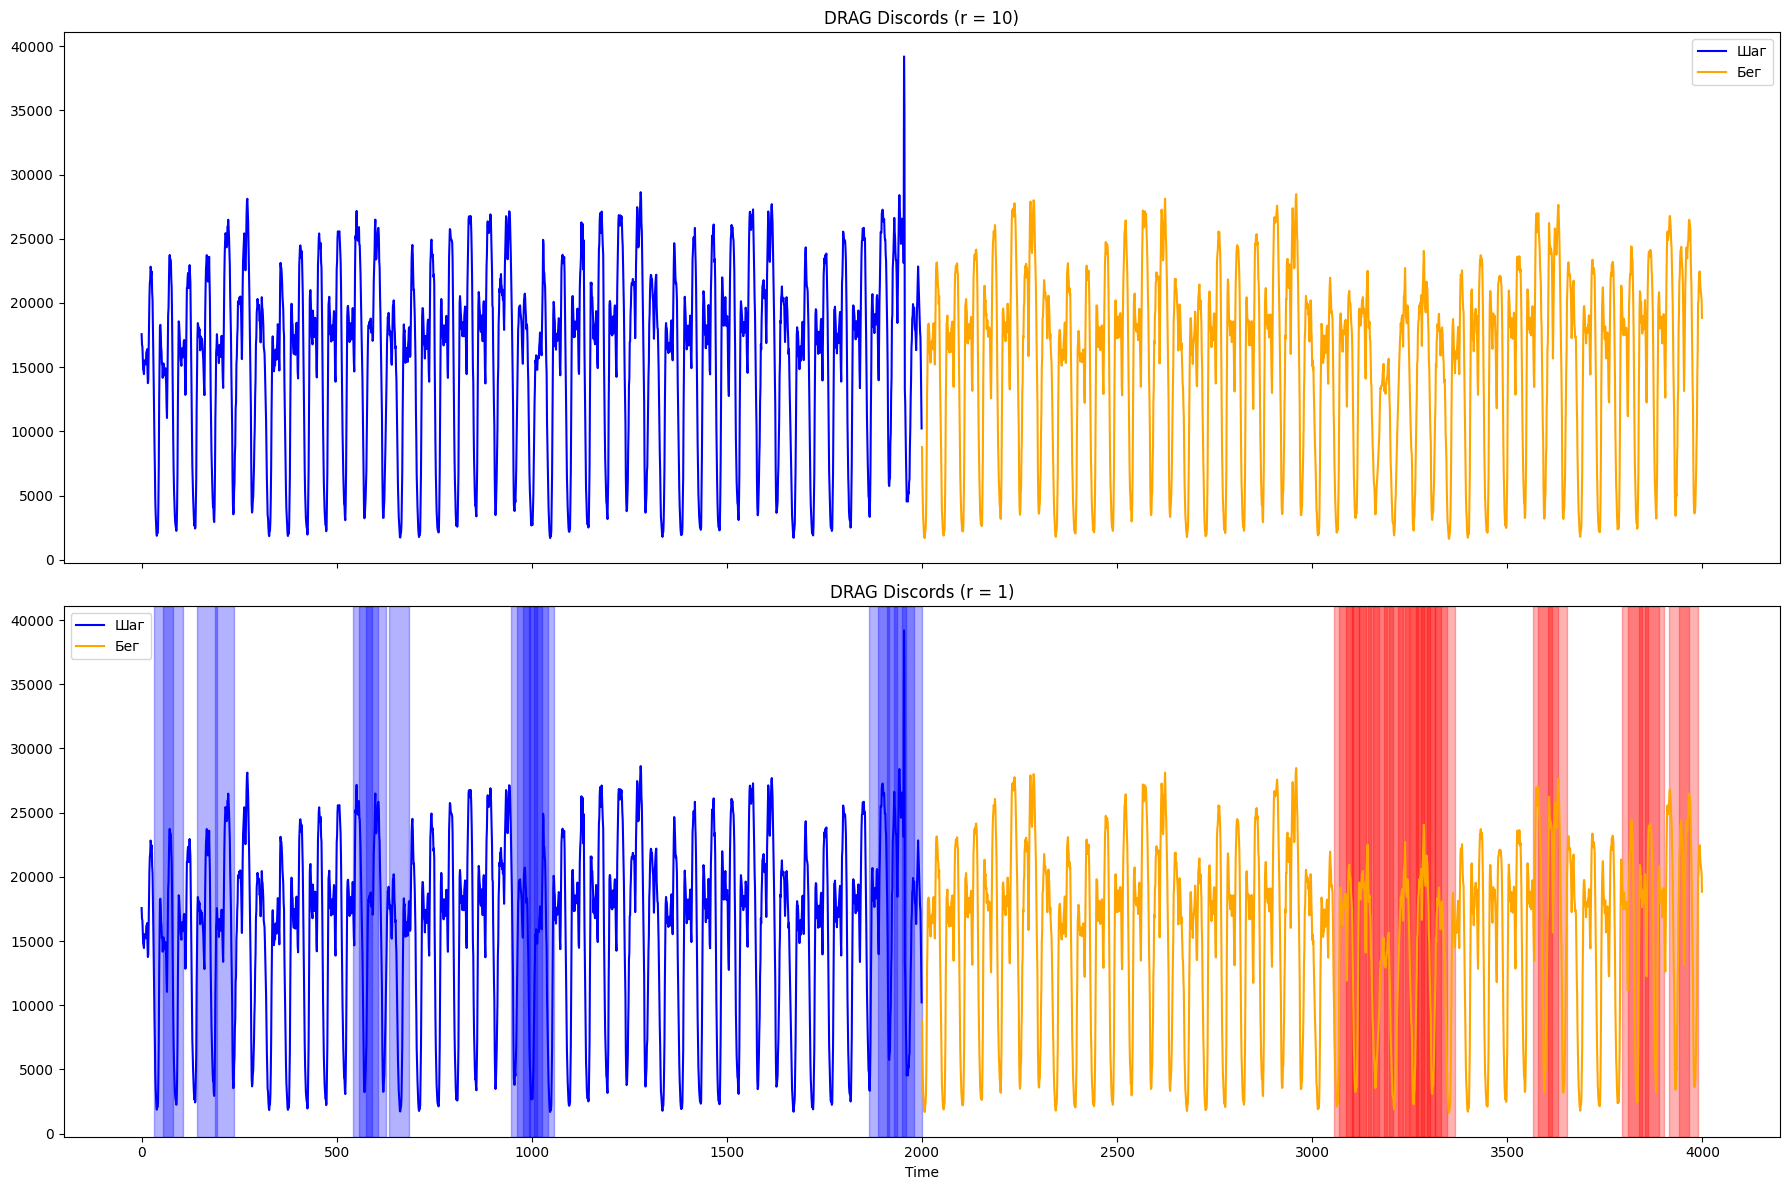

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from modules.drag import DRAG

# Загрузка данных о такси в Нью-Йорке
nyc_taxi = pd.read_csv(dataset_dir_path / 'nyc_taxi.csv', index_col=0).values[4000:8000, 0].astype(np.float64)

# Установка параметров
m = 50  # длина диссонанса
r_values = [10, 1]  # значения порога для экспериментов
split_point = len(nyc_taxi) // 2  # Точка разделения данных на "Шаг" и "Бег"

# Функция для поиска и отображения диссонансов
def plot_drag_discords(data, m, r_values, split_point):
    fig, axs = plt.subplots(len(r_values), 1, figsize=(18, 6 * len(r_values)), sharex=True)
    
    for i, r in enumerate(r_values):
        # Разделение данных на "Шаг" и "Бег"
        step_data = data[:split_point]
        run_data = data[split_point:]
        
        # Поиск диссонансов в обеих частях данных
        step_idxs, _, _ = DRAG(step_data, m, r)
        run_idxs, _, _ = DRAG(run_data, m, r)
        idxs, _, _ = DRAG(data, m, r)
        print(f'Количество найденных диссонансов для r={r}: {len(idxs)}')
        
        # Визуализация данных для "Шага"
        axs[i].plot(step_data, label="Шаг", color='blue')
        for idx in step_idxs:
            axs[i].axvspan(idx, idx + m, color='blue', alpha=0.3)  # выделение диссонансов для "Шага"

        # Визуализация данных для "Бега"
        axs[i].plot(np.arange(split_point, len(data)), run_data, label="Бег", color='orange')
        for idx in run_idxs:
            axs[i].axvspan(split_point + idx, split_point + idx + m, color='red', alpha=0.3)  # выделение диссонансов для "Бега"

        # Заголовок и легенда
        axs[i].set_title(f'DRAG Discords (r = {r})')
        axs[i].legend()
    
    plt.xlabel("Time")
    plt.tight_layout()
    plt.show()

# Проведение экспериментов с разными значениями r
plot_drag_discords(nyc_taxi, m, r_values, split_point)


Чтобы разобраться, почему так происходит и как работает данный алгоритм, ниже мы реализуем все этапы алгоритма DRAG.

Как мы помним из лекций алгоритм DRAG содержит два этапа:

1. Отбор - За одно сканирование ряда сформировать множество кандидатов в диссонансы.
2. Очистка - За одно сканирование ряда отбросить кандидатов, которые являются ложными диссонансами.

##### 3.2.1 Отбор кандидатов

Первым этапом обработки данных является отбор множества потенциальных кандидатов. Мы выбираем из всего множества подпоследовательностей ряда такие, для которых расстояние до правых ближайших соседей больше параметра $r$.

In [34]:
#выбирем более реальное значение для порога
r = 3

In [35]:
T, M_T, Σ_T = core.preprocess(data, m)
#формируем массив длинной равной длине  исходного ряда - m + 1, 
#элемент массива является истинным, 
#в том случае если подпоследовательность является потенциальным кандидатом
is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=None, right=True)
#находим индексы потенциальных кандидатов
cand_index = np.flatnonzero(is_cands)

In [36]:
print(f'{len(cand_index)} {len(cand_index)/len(data)*100} %')

113 11.3 %


Во время отбора кандидатов нам удалось выделить около 113 подпоследовательностей(около 11.3%), которые мы бы могли назвать потенциальными диссонансами.
Это большой процент, который не может нас устраивать как конечный результат.
Если посмотреть на рисунок ниже, мы увидим, что большая часть потенциальных диссонансов расположена в районе смены активности. 
К сожалению пресутсвуют и ложные диссонансы, которые случайным образом попали в данный список.

Сформируйте график найденных диссонансов

113 кандидатов (11.30 % от длины ряда)


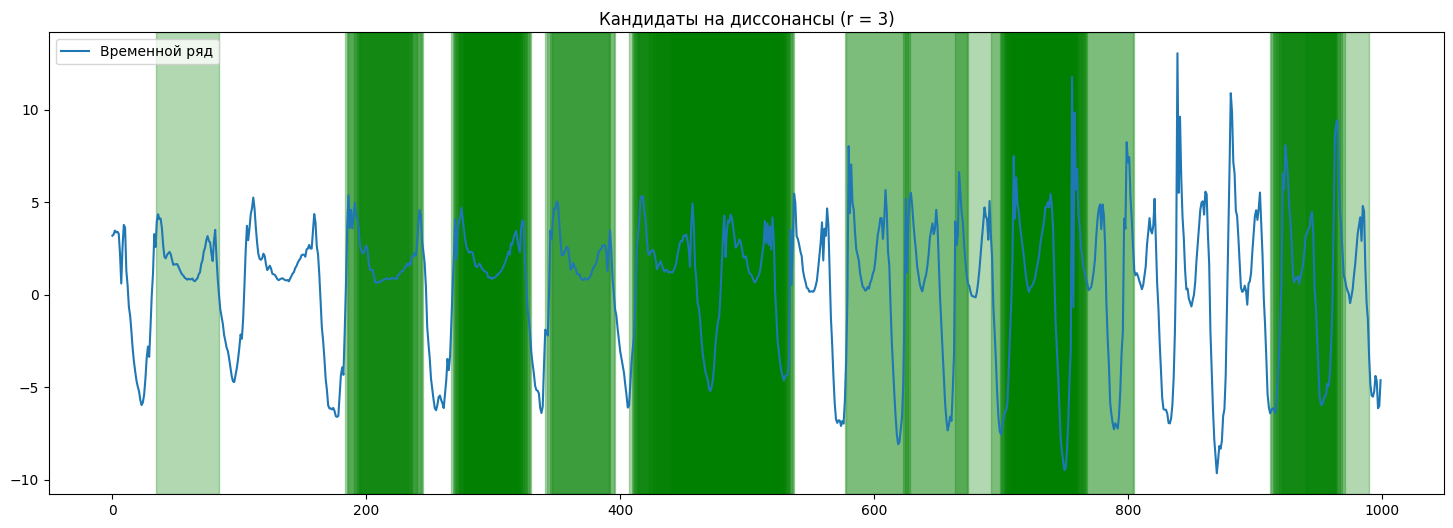

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from stumpy import core
from modules.drag import find_candidates

# Загрузка данных
data = walk_run  # Активность человека (Шаг и Бег)

# Параметры
m = 50  # длина подпоследовательности
r = 3   # пороговое значение расстояния

# Предварительная обработка данных
T, M_T, Σ_T = core.preprocess(data, m)

# Поиск кандидатов на диссонансы
is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=None, right=True)

# Поиск индексов потенциальных кандидатов
cand_index = np.flatnonzero(is_cands)
print(f'{len(cand_index)} кандидатов ({len(cand_index)/len(data)*100:.2f} % от длины ряда)')

# Построение графика
plt.figure(figsize=(18, 6))

# Отображение временного ряда
plt.plot(data, label='Временной ряд')

# Выделение кандидатов на графике
for idx in cand_index:
    plt.axvspan(idx, idx + m, color='green', alpha=0.3)  # Кандидаты на диссонансы

# Добавление легенды и заголовка
plt.title(f'Кандидаты на диссонансы (r = {r})')
plt.legend()
plt.show()


##### 3.2.2 Очистка кандидатов
Как уже упоминалось выше, 11.3% слишком большой процент диссонансов.
Для уменьшения числа потенциальных кандидатов произведем очистку от ложных диссонансов, путем сравнения расстояния до левых ближайших соседей потенциальных диссонансов с порогом $r$.


In [42]:
is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=is_cands, right=False)
cands = np.flatnonzero(is_cands)

In [43]:
len(cands)/len(data)*100

2.9000000000000004

Сформируйте график найденных диссонансов

29 кандидатов (2.90 % от длины ряда)


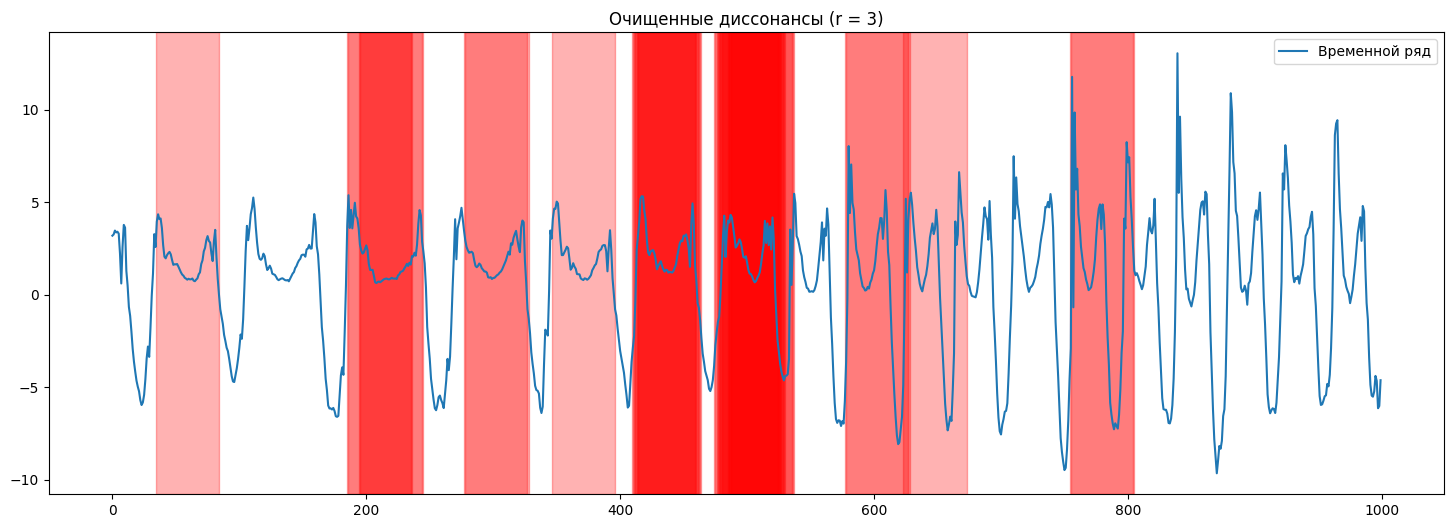

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from stumpy import core
from modules.drag import find_candidates

# Загрузка данных
data = walk_run  # Активность человека (Шаг и Бег)

# Параметры
m = 50  # длина подпоследовательности
r = 3   # пороговое значение расстояния

# Предварительная обработка данных
T, M_T, Σ_T = core.preprocess(data, m)

# Поиск кандидатов на диссонансы (по правым ближайшим соседям)
is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=None, right=True)

# Очистка кандидатов (по левым ближайшим соседям)
is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=is_cands, right=False)

# Поиск индексов оставшихся кандидатов
cands = np.flatnonzero(is_cands)
print(f'{len(cands)} кандидатов ({len(cands)/len(data)*100:.2f} % от длины ряда)')

# Построение графика
plt.figure(figsize=(18, 6))

# Отображение временного ряда
plt.plot(data, label='Временной ряд')

# Выделение окончательных диссонансов на графике
for idx in cands:
    plt.axvspan(idx, idx + m, color='red', alpha=0.3)  # Очищенные диссонансы

# Добавление легенды и заголовка
plt.title(f'Очищенные диссонансы (r = {r})')
plt.legend()
plt.show()


Нам удалось сократить число диссонансов до 2.9%. Если проанализировать рисунок, то можно заметить, что большая их часть является тривиальными повторениями подпоследовательности в области смены активности. На следующем шаге избавимся от них.

In [45]:
from modules.drag import refine_candidates
discords_idx, discords_dist, discords_nn_idx = refine_candidates(T, m, M_T, Σ_T, is_cands)
len(discords_idx)/len(data)*100

0.8999999999999999

Сформируйте график найденных диссонансов

9 диссонансов (0.90 % от длины ряда)


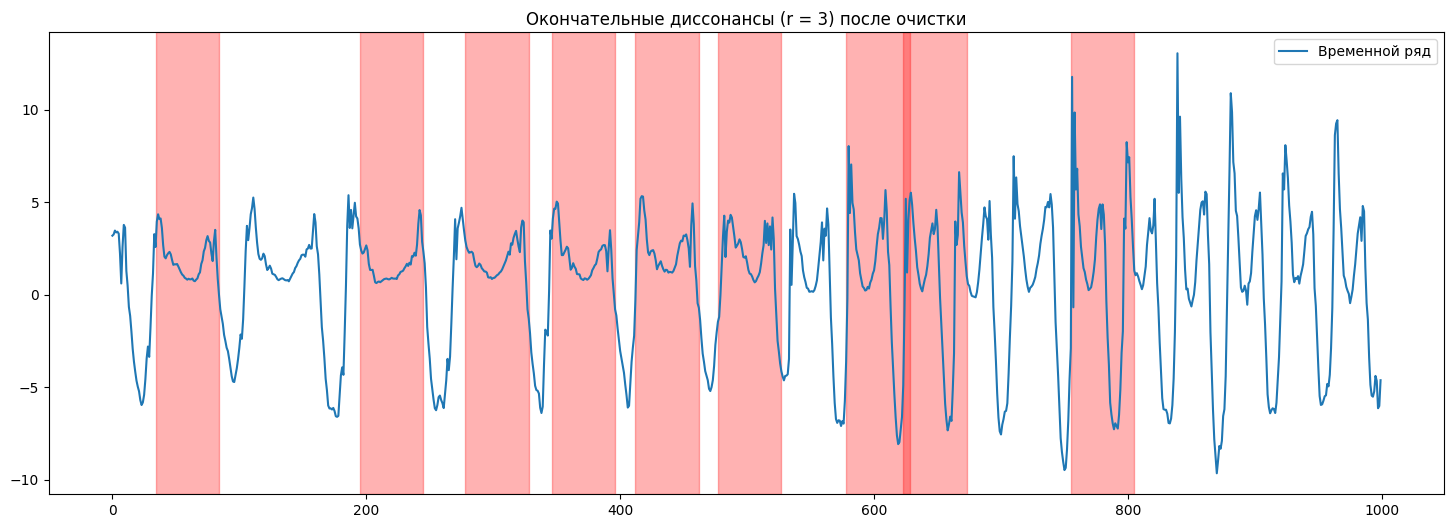

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from stumpy import core
from modules.drag import find_candidates, refine_candidates

# Загрузка данных
data = walk_run  # Активность человека (Шаг и Бег)

# Параметры
m = 50  # длина подпоследовательности
r = 3   # пороговое значение расстояния

# Предварительная обработка данных
T, M_T, Σ_T = core.preprocess(data, m)

# Поиск кандидатов на диссонансы (по правым и левым ближайшим соседям)
is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=None, right=True)
is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=is_cands, right=False)

# Уточнение диссонансов
discords_idx, discords_dist, discords_nn_idx = refine_candidates(T, m, M_T, Σ_T, is_cands)
print(f'{len(discords_idx)} диссонансов ({len(discords_idx)/len(data)*100:.2f} % от длины ряда)')

# Построение графика
plt.figure(figsize=(18, 6))

# Отображение временного ряда
plt.plot(data, label='Временной ряд')

# Выделение окончательных диссонансов на графике
for idx in discords_idx:
    plt.axvspan(idx, idx + m, color='red', alpha=0.3)  # Окончательные диссонансы

# Добавление легенды и заголовка
plt.title(f'Окончательные диссонансы (r = {r}) после очистки')
plt.legend()
plt.show()


##### 3.2.3 Подбор параметров

Реализуйте перебор параметров $m$ и $r$. Подберете параметры таким образом, чтобы алгоритм обнаружил только те диссонансы, которые связаны со сменой активности. Сделайте вывод о том, как эти параметры влияют на качество работы модели.
Подберите оптимальные параметры алгоритма для набора данных такси NY. 
Визуализируйте результаты для разных комбинаций. Сделайте выводы.


Параметры m=30, r=1 -> Найдено 58 диссонансов (1.45 % от длины ряда)


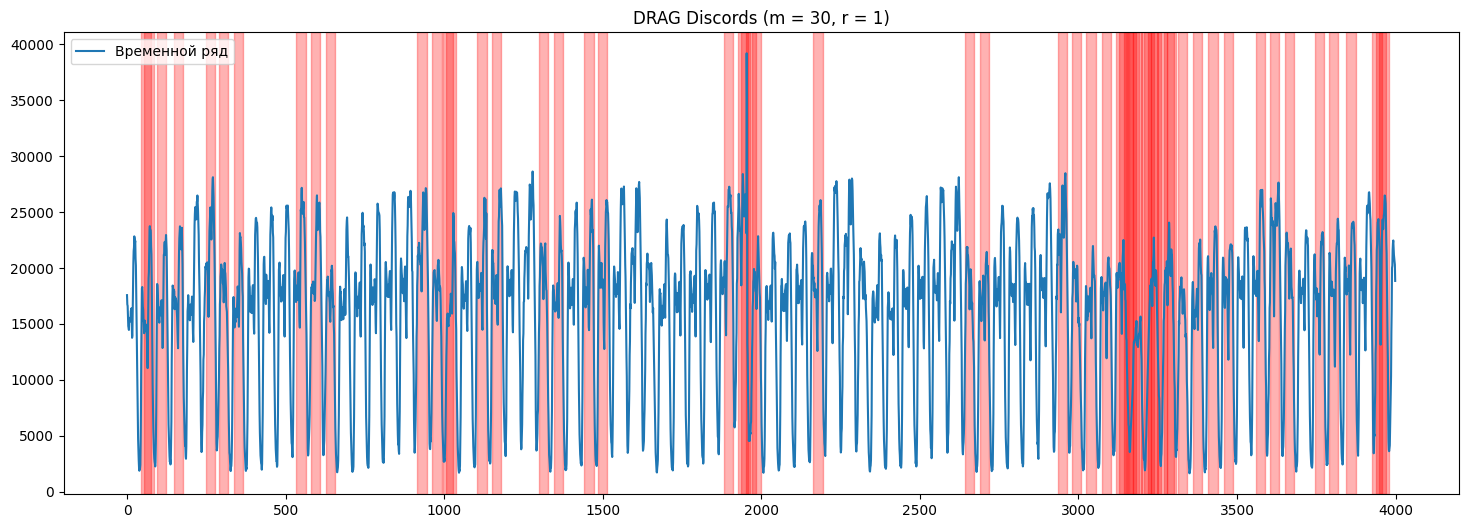

Параметры m=30, r=2 -> Найдено 12 диссонансов (0.30 % от длины ряда)


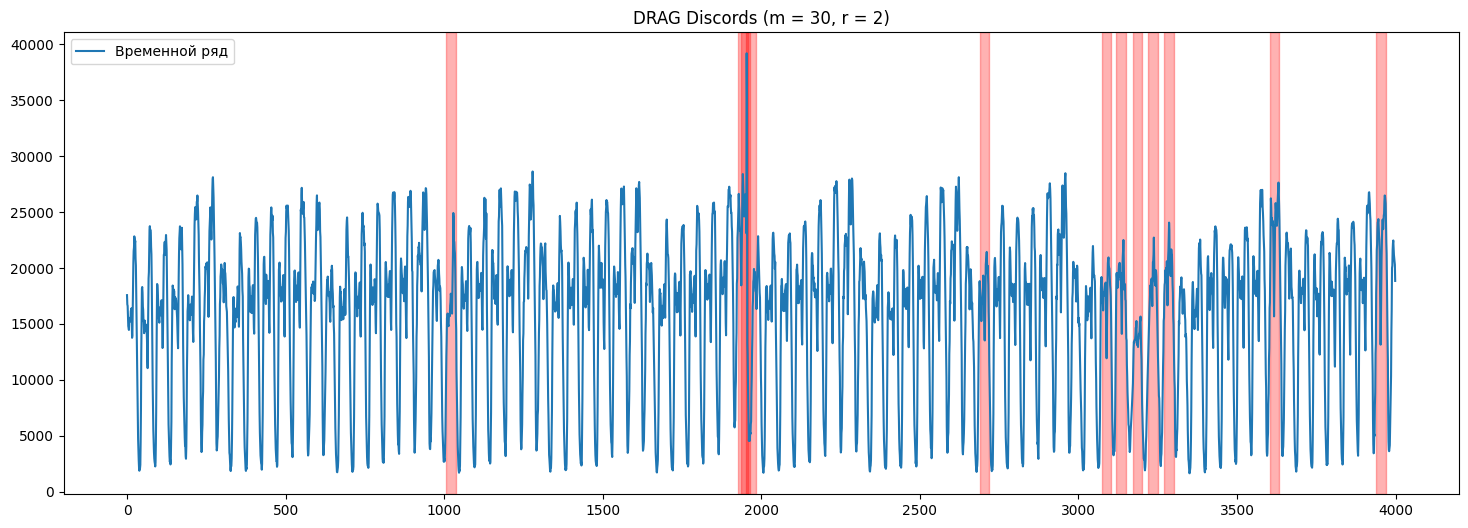

Параметры m=30, r=3 -> Найдено 2 диссонансов (0.05 % от длины ряда)


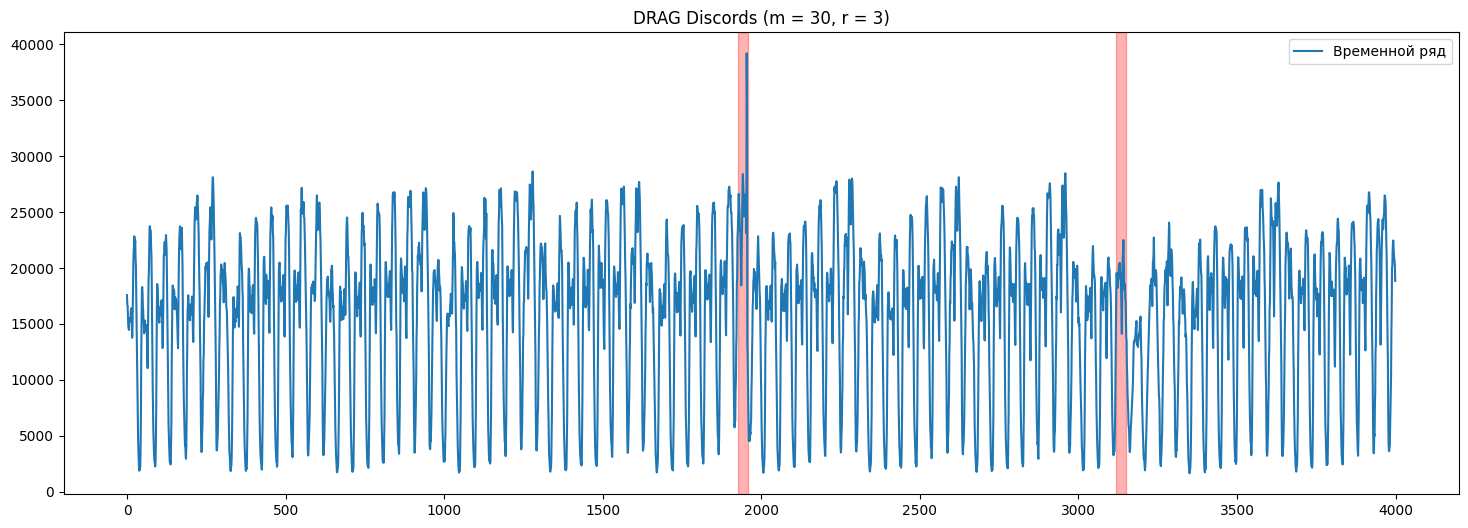

Параметры m=30, r=5 -> Найдено 1 диссонансов (0.03 % от длины ряда)


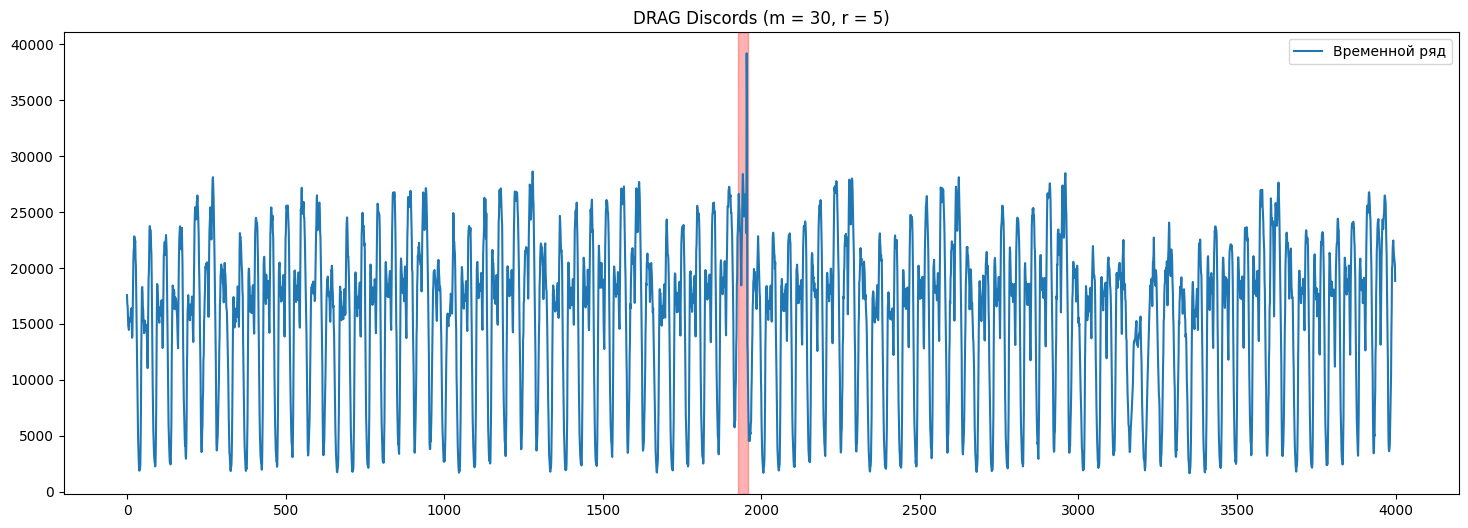

Параметры m=50, r=1 -> Найдено 42 диссонансов (1.05 % от длины ряда)


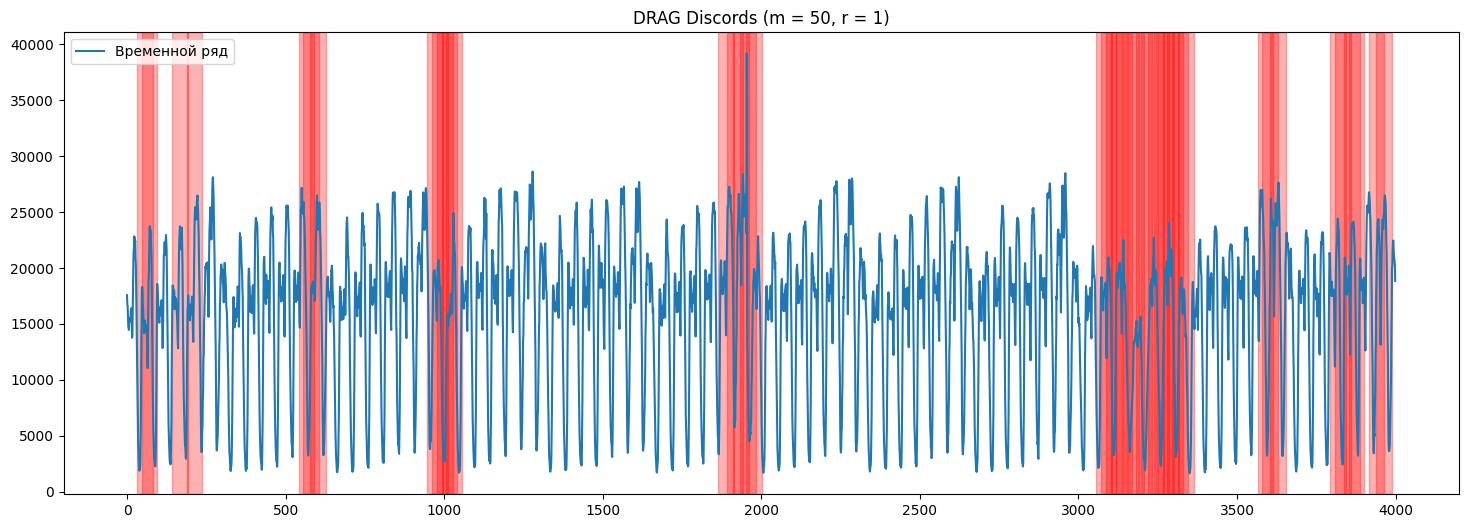

Параметры m=50, r=2 -> Найдено 8 диссонансов (0.20 % от длины ряда)


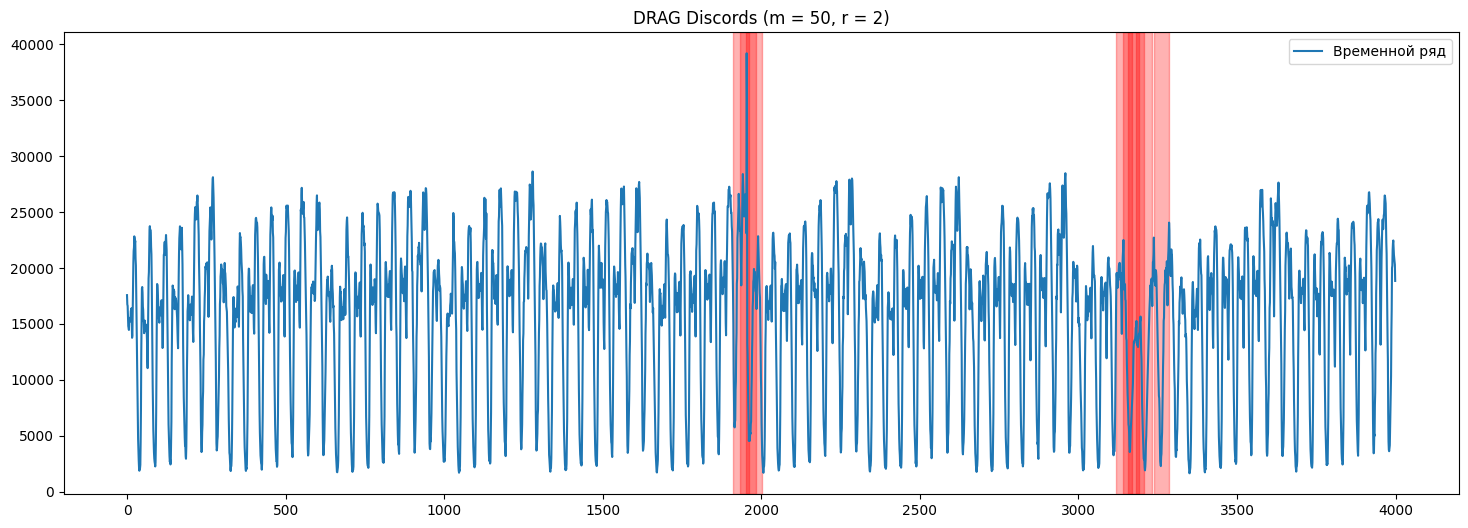

Параметры m=50, r=3 -> Найдено 4 диссонансов (0.10 % от длины ряда)


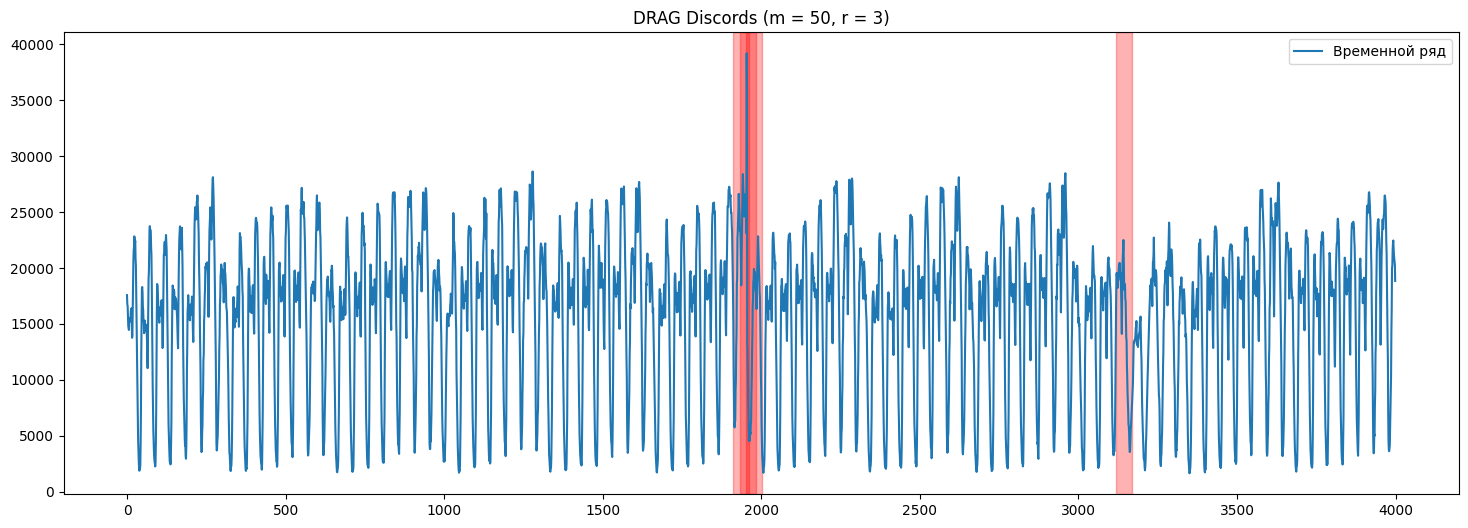

Параметры m=50, r=5 -> Найдено 0 диссонансов (0.00 % от длины ряда)


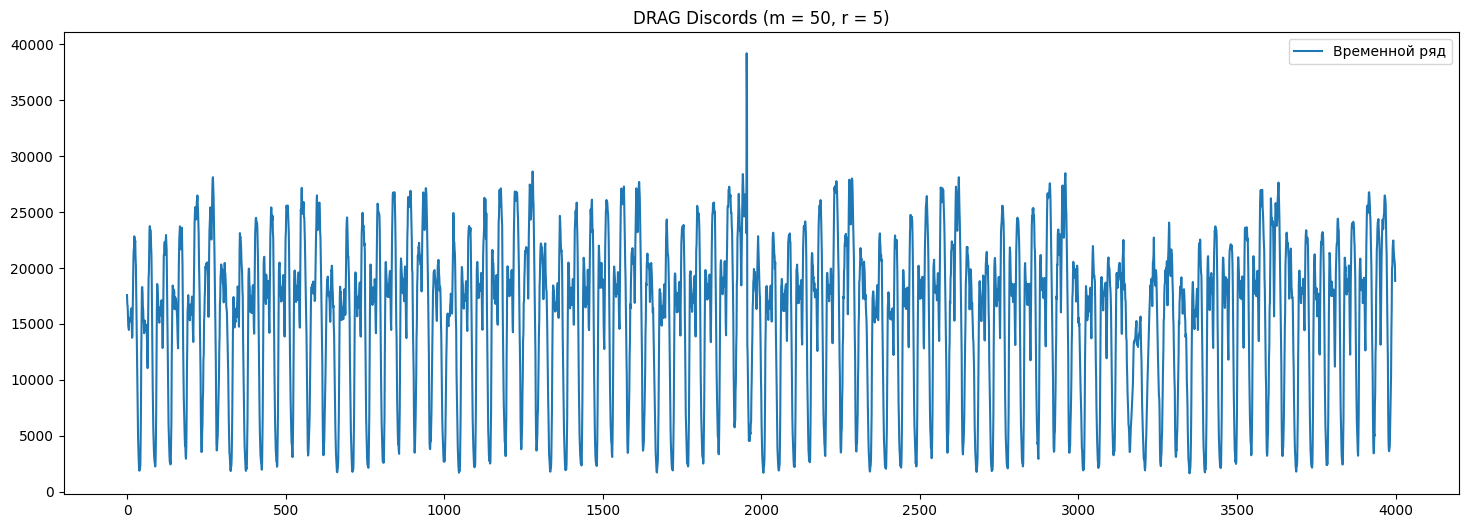

Параметры m=70, r=1 -> Найдено 62 диссонансов (1.55 % от длины ряда)


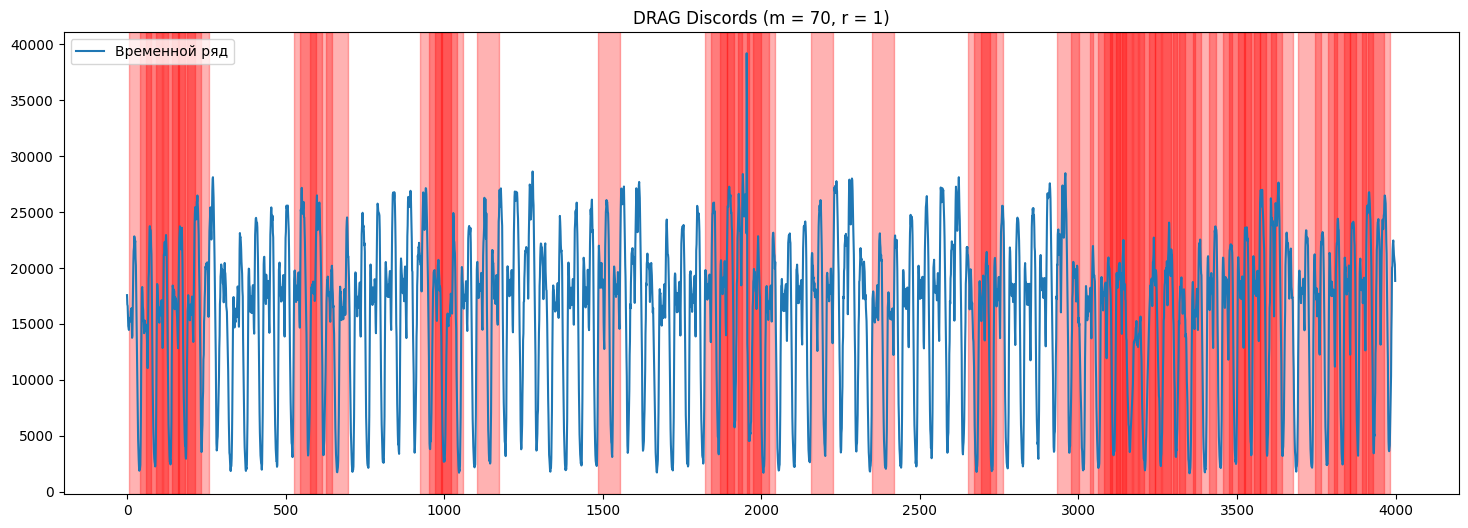

Параметры m=70, r=2 -> Найдено 15 диссонансов (0.38 % от длины ряда)


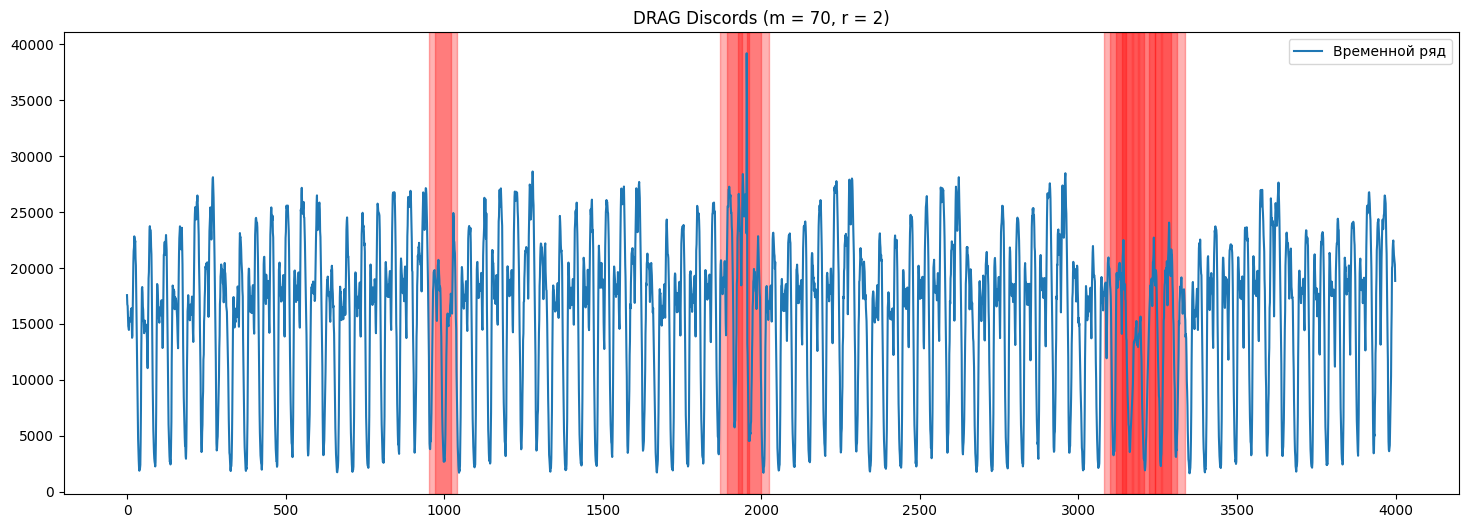

Параметры m=70, r=3 -> Найдено 8 диссонансов (0.20 % от длины ряда)


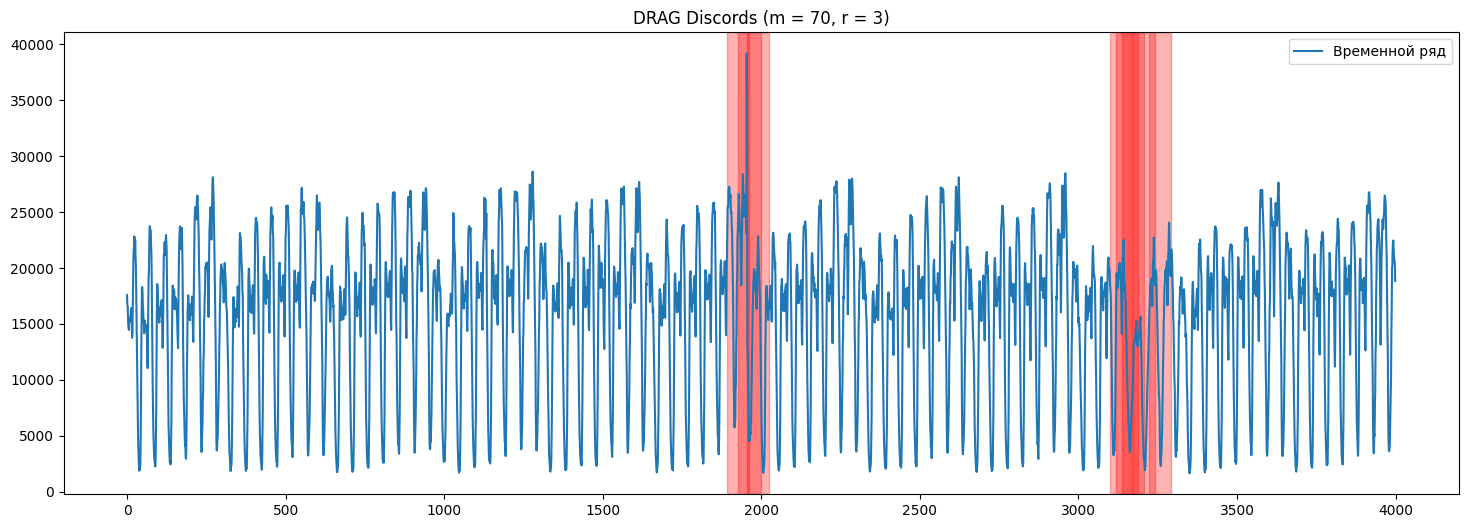

Параметры m=70, r=5 -> Найдено 1 диссонансов (0.03 % от длины ряда)


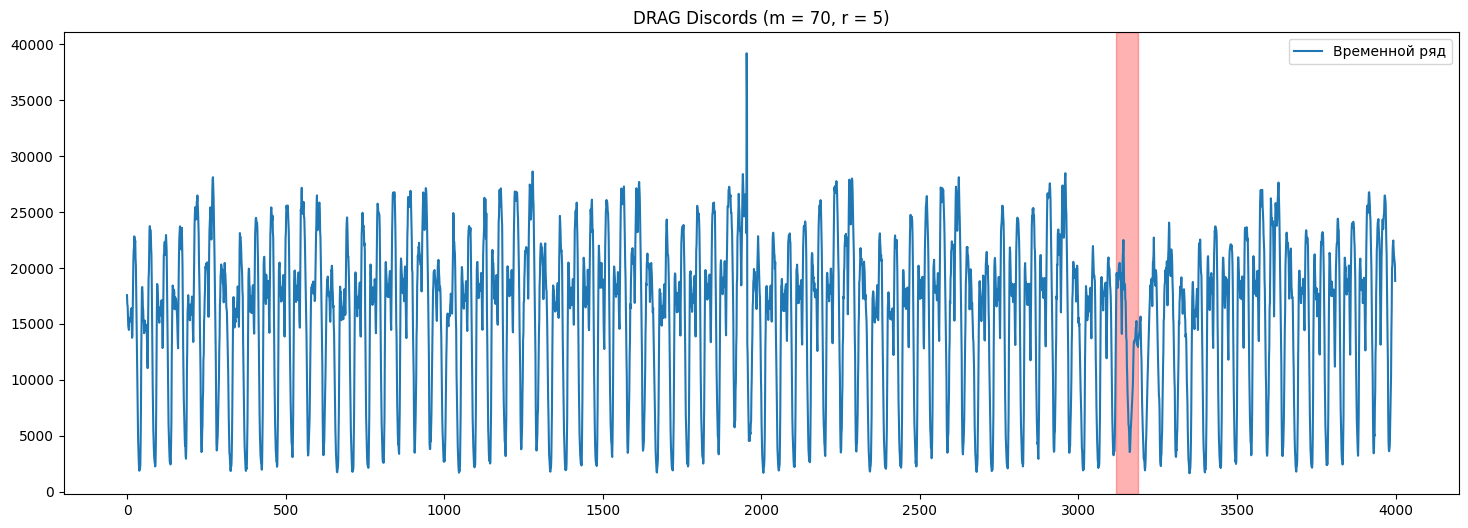

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from stumpy import core
from modules.drag import find_candidates, refine_candidates

# Загрузка данных
data = nyc_taxi  # Данные о такси в Нью-Йорке

# Параметры для перебора
m_values = [30, 50, 70]  # длина подпоследовательности
r_values = [1, 2, 3, 5]  # пороговое значение

# Функция для визуализации диссонансов
def plot_discords(data, discords_idx, m, r):
    plt.figure(figsize=(18, 6))
    plt.plot(data, label='Временной ряд')
    for idx in discords_idx:
        plt.axvspan(idx, idx + m, color='red', alpha=0.3)  # Окончательные диссонансы
    plt.title(f'DRAG Discords (m = {m}, r = {r})')
    plt.legend()
    plt.show()

# Перебор параметров m и r
for m in m_values:
    for r in r_values:
        # Предварительная обработка данных
        T, M_T, Σ_T = core.preprocess(data, m)

        # Поиск кандидатов на диссонансы (по правым и левым ближайшим соседям)
        is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=None, right=True)
        is_cands = find_candidates(T, m, M_T, Σ_T, r, init_cands=is_cands, right=False)

        # Уточнение диссонансов
        discords_idx, discords_dist, discords_nn_idx = refine_candidates(T, m, M_T, Σ_T, is_cands)

        # Вывод количества диссонансов
        print(f'Параметры m={m}, r={r} -> Найдено {len(discords_idx)} диссонансов ({len(discords_idx)/len(data)*100:.2f} % от длины ряда)')

        # Визуализация диссонансов
        plot_discords(data, discords_idx, m, r)


Параметр m (длина подпоследовательности):
Чем больше значение m, тем длиннее должны быть выделяемые подпоследовательности, что позволяет выявлять более значимые изменения в поведении временного ряда, а не краткосрочные флуктуации.
Слишком маленькие значения m могут привести к множеству ложных срабатываний, так как короткие аномальные последовательности проще встретить в случайных колебаниях данных.

Параметр r (порог для ближайших соседей):
Более высокое значение r позволяет уменьшить количество ложных срабатываний, требуя, чтобы диссонансы были значительно отличающимися от ближайших соседей.
Слишком маленькое значение r может привести к избыточному числу кандидатов, так как даже незначительные отклонения будут рассматриваться как потенциальные диссонансы.

Анализ результатов для NY Taxi данных

Каждая комбинация параметров m и r генерирует различные числа диссонансов, которые мы визуализируем для оценки их расположения в временном ряде. Например, при m=70 и r=5 алгоритм нашел лишь один диссонанс, что может указывать на хорошо настроенные параметры, если этот диссонанс действительно соответствует смене активности. Однако, если найденных диссонансов мало и они не покрывают все ожидаемые смены активности, возможно, параметры завышены.

Выводы

При малых значениях m и r часто выявляется большое число диссонансов, в том числе ложных. Это свидетельствует о необходимости увеличения порога r или длины окна m.
При больших значениях m и r количество диссонансов сокращается, что позволяет выделить более значимые события, но с риском пропустить некоторые смены активности.

Подбор оптимальных параметров состоит в нахождении таких значений m и r, при которых диссонансы сосредоточены в местах смены активности, как в данных о такси.

#### **3.3 Поиск диссонансов с помощью алгоритма Merlin**

Как мы уже выяснили подбирать параметры для DRAG простым перебором не очень удобно. Для оптимизации данного процесса в статье [1] был предложен алгоритм Merlin для оптимального поиска подходящего порогового значения.

Условно мы можем разделить поиск диссонансов на три шага:

1. Поиск диссонансов минимальной длинны $minL$. На данном шаге $r = 2\sqrt{minL}$.
2. Поиск диссонансов следующих четырех длин. На данном шаге $r = 0.99 \cdot nndist_{m-1}$. Где $nndist_{m-1}$ - расстояние до ближайшего соседа предыдущего найденного диссонанса.
3. Поиск диссонансов всех 
оставшихся дли. $r = \mu - 2 \sigma$. Средние значение и стандартное отклонение вычисляются из расстояний 5 предыдущих диссонансов. н

[1] Nakamura T., Imamura M., Mercer R., Keogh E.J. MERLIN: parameter-free discovery of arbitrary length anomalies in massive time series archives. 20th IEEE Int. Conf. on Data Mining, ICDM 2020, Sorrento, Italy, November 17-20, 2020. pp. 1190-1195. IEEE (2020). https://doi.org/10.1109/ICDM50108.2020.00147

##### 3.3.1 Поиск диссонансов минимальной длинны

Вспомнил последовательность действий первого шага алгоритма:
![merlin-part-first](pics/first_part.png)

В данной работе мы внесем небольшое изменение, мы будем считать, что подпоследовательность может быть диссонансом только в том случае, если больше 75% точек, не входят в состав других диссонансов. 

In [60]:
T = walk_run
m = 50
# сформируем массив метод для потенциальных кандидатов в диссонансы.
# после каждого найденного диссонанса, 
# мы будем исключать окружающие его подпоследовательности из числа потенциальных кандидатов,
# путем замены значений их меток на false
excl_zone = int(np.ceil(m / 4))
include = np.ones(len(T)-m+1, dtype=bool)
# Количество диссонансов, которые мы будем искать
topK = 10


In [61]:
dis_idx = -np.ones((topK))
dis_nnDist = -np.ones((topK))
dis_nn_idx = np.full((topK),-np.inf)
#первое прближение r
r = 2*np.sqrt(m)
minL = m
maxL = int(m+np.ceil(m*0.1))
#количество найденных диссонасов
cound_find_dis = 0

while dis_nnDist[cound_find_dis-1]<0 and cound_find_dis<topK:
    result = DRAG(data=T,m=minL,r=r, include =include)
    for diss, nnDist, nn in zip(*result):
        dis_idx[cound_find_dis] = diss
        dis_nnDist[cound_find_dis] = nnDist
        dis_nn_idx[cound_find_dis] = nn
        #исключаем окружающие найденный диссонас 
        #подпоследовательности и числа потенциальных диссонасов
        core.apply_exclusion_zone(include, diss, excl_zone, False)
        cound_find_dis+=1
        if cound_find_dis>=topK:
            break
    r*=0.5

In [62]:
maxL

55

In [63]:
print('Количество найденных на первом этапе диссонансов:', cound_find_dis)

Количество найденных на первом этапе диссонансов: 2


На первом шаге нам удалось выделить 2 диссонанса из 10 требуемых. 
Реализуйте, оставшиеся шаги алгоритма, чтобы найти оставшиеся диссонансы. 

![merlin-part-first](pics/second_part.png)


In [64]:
# INSERT YOUR CODE

Найдите диссонансы набора такси NY. Визуализируйте найденные диссонансы для обоих наборов данных, сравните с результатами остальных методов. 


In [65]:
# INSERT YOUR CODE